# Student Habits vs Academic Performance

Dataset: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

## Introduction

This analysis explores the relationships between students' lifestyle habits—such as screen time, study hours, sleep, exercise, and mental health—and their academic performance. Using a dataset of self-reported behaviours and exam scores, the goal is to identify patterns that might explain why some students perform better than others.

By investigating both individual and combined effects of different habits on exam outcomes, the report aims to uncover insights that could inform personal study strategies, student wellbeing initiatives, or broader educational interventions.

----

## 1. Data Import & Overview

Before conducting any analysis, we load and inspect the dataset to understand its structure and content.

#### Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [3]:
df = pd.read_csv("student_habits_performance.csv")

#### Preview Dataset

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### Summary Statistics

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


- The average exam score is approximately 69.6 with a standard deviation of 16.9.
- Students study an average of 3.6 hours per day, spend about 2.5 hours on social media, and sleep about 6.5 hours.
- Mental health ratings and other variables also show significant variability, highlighting potential areas of influence on performance.

#### Dataset Shape

In [6]:
print('Shape:', df.shape)   # (rows, columns)

Shape: (1000, 16)


The dataset includes 1,000 students and 16 columns, representing a mix of numerical, categorical, and boolean features. More detailed inspection and data type correction will follow in the next section.

-----

## 2. Data Cleaning 

Before we get started with analysing the data, we will clean the dataset by handling missing values, correct data types, and check for duplicates and outliers.

#### Handling Missing values

In [7]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

The parental_education_level column has 91 missing values (9.1%).
Since this feature is not essential to our core analysis, we will drop it to avoid introducing bias through imputation.

In [8]:
df = df.drop(columns=["parental_education_level"])

#### Checking for Duplicates

In [9]:
print(df.duplicated().sum())

0


No duplicate rows were found in the dataset.

#### Reviewing and Fixing Data Types

Let's check the current data types and convert them where appropriate.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

\
The dataset includes:

- **Numerical columns**: age, study hours, screen time, sleep hours, etc.

- **Categorical columns** (object): gender, diet quality, internet quality

- **Yes/No columns**: part-time job, extracurricular participation

Convert categorical features to category type:

In [11]:
categorical_cols = ["gender", "diet_quality","internet_quality"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

Convert Yes/No features to boolean:

In [12]:
df["part_time_job"] = df["part_time_job"].map({"Yes": True, "No": False})
df["extracurricular_participation"] = df["extracurricular_participation"].map({"Yes": True, "No": False})

#### Spotting Outliers in Exam Scores

Let us visualise the distribution of **exam_score** using a histogram and boxplot.

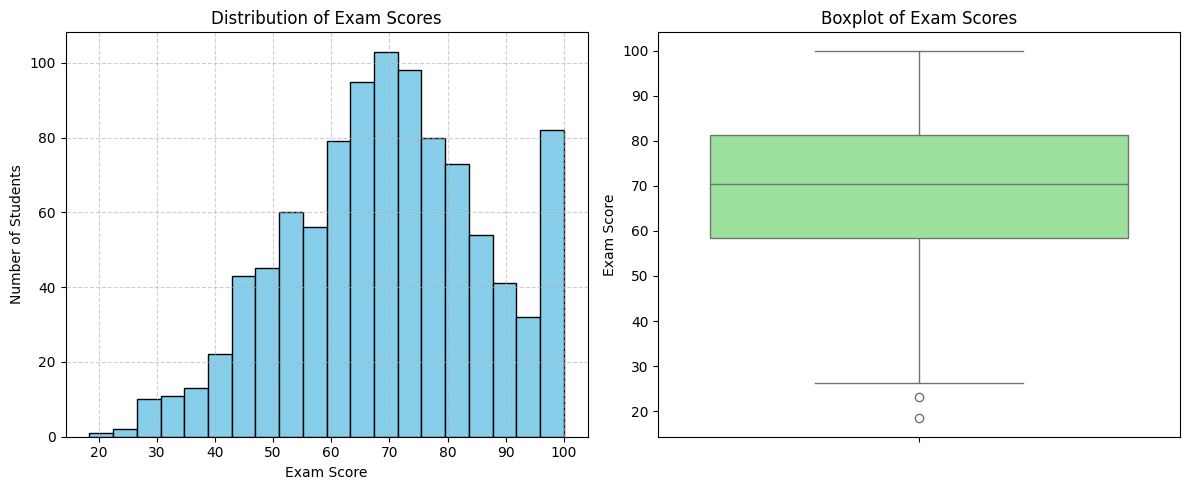

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram 
axes[0].hist(df["exam_score"], bins=20, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Exam Scores")
axes[0].set_xlabel("Exam Score")
axes[0].set_ylabel("Number of Students")
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot 
sns.boxplot(y=df["exam_score"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Exam Scores")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

**Observations:**

- **High scorers**: More students than expected scored close to 100%. These are not statistical outliers and will be kept.
- **Low scorers**: A few students fall below the lower whisker and will be reviewed as potential outliers.

Calculate whiskers using IQR:

In [14]:
Q1 = df["exam_score"].quantile(0.25)
Q3 = df["exam_score"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Lower whisker limit: {lower_whisker:.2f}")
print(f"Upper whisker limit: {upper_whisker:.2f}")

Lower whisker limit: 24.20
Upper whisker limit: 115.60


Identify and review low outliers:

In [15]:
outliers_df = df[df['exam_score'] < lower_whisker]
outliers_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
265,S1265,18,Female,0.6,3.1,3.0,False,79.9,5.2,Good,1,Good,4,False,18.4
327,S1327,23,Male,0.9,2.4,2.5,False,89.2,6.9,Fair,0,Poor,1,False,23.1


These students scored significantly below the rest and show:

- Very low study hours

- Poor mental health

- High screen time

Remove these two extreme outliers:

In [16]:
df = df[df['exam_score'] >= 24]

#### Post Cleaning Shape Check

In [17]:
df.shape

(998, 15)

----

## 3. Exploratory Data Analysis

This section explores the underlying patterns in the dataset by analysing both numerical and categorical variables. The goal is to identify key factors that may influence exam performance, using correlation analysis and group-wise comparisons.

### 3.1 Numerical Data Relationships 

#### Correlation Analysis

To understand relationships between numerical variables, let us generate a correlation matrix.

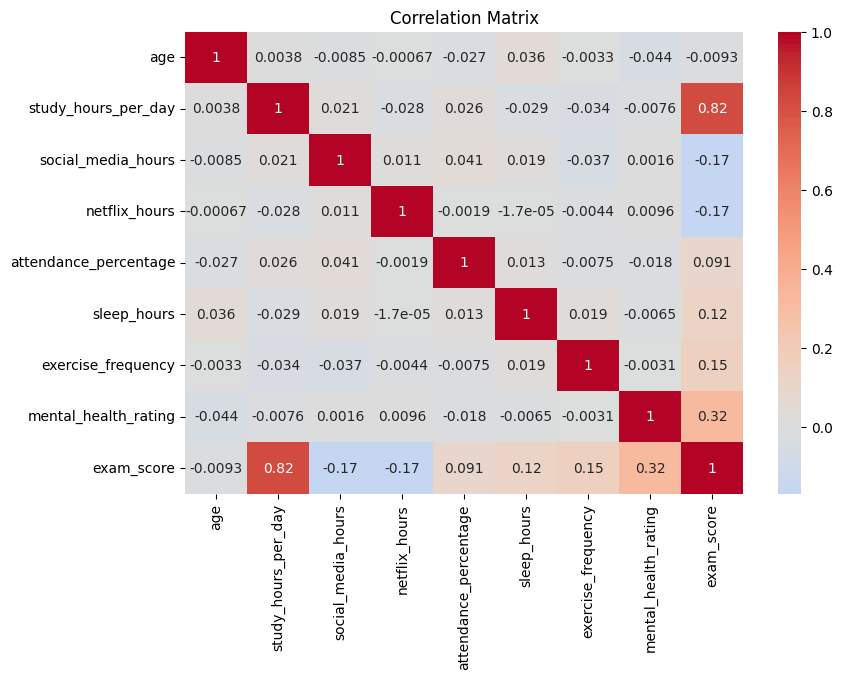

In [18]:
# Only keep numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_cols.corr()

# Plot
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

**Notable correlations with exam_score:**

- **Study hours per day**: Strong positive correlation (**+0.82**), indicating a clear relationship between more study time and higher exam performance.

- **Mental health rating**: Moderate positive correlation (**+0.32**), suggesting better mental health is associated with higher scores.

- **Social media hours** and **Netflix hours**: Weak negative correlations (around **-0.17**), hinting that higher screen time may slightly reduce performance.

- **Exercise frequency** (**+0.15**) and **sleep hours** (**+0.12**): Weak positive relationships, indicating slight benefits to academic outcomes.

Other variables, including age and attendance, showed weak or negligible correlations with exam scores.

### 3.2 Category-based Analysis

Compare average exam scores accross various categorical and boolean groups:

In [19]:
cat_cols = ["gender", "part_time_job", "diet_quality", "internet_quality", "extracurricular_participation"]

for col in cat_cols:
    print(f"\n---- {col} ----")
    means = df.groupby(col, observed=True)["exam_score"].mean().round(3)
    means.name = None              
    means.index.name = None     
    print(means)


---- gender ----
Female    69.848
Male      69.466
Other     70.648
dtype: float64

---- part_time_job ----
False    69.962
True     68.743
dtype: float64

---- diet_quality ----
Fair    70.537
Good    69.502
Poor    68.128
dtype: float64

---- internet_quality ----
Average    70.644
Good       68.760
Poor       70.007
dtype: float64

---- extracurricular_participation ----
False    69.735
True     69.623
dtype: float64


\
**Key Observations**:

- **Diet quality** shows a consistent pattern—poorer diets are associated with lower scores.

- **Part-time job** holders score slightly lower on average, though the difference is modest.

- **Gender** and **extracurricular participation** have minimal impact on performance.

- **Internet quality** does not follow a clear or expected trend.



----

## 4. Individual Factors and Academic Performance

This section explores key individual factors that influence exam scores: study time, mental health, and screen time.

### 4.1 Study Time 

A strong positive relationship is evident between daily study hours and exam performance. Students who dedicate more time to studying tend to achieve higher exam scores.

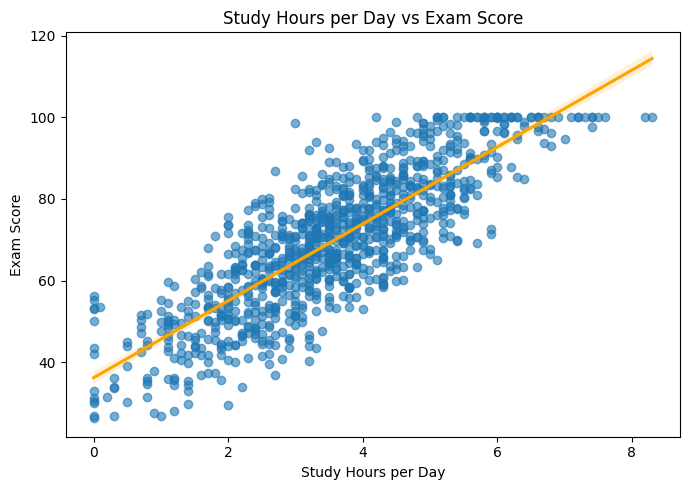

In [37]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('Study Hours per Day vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

There is a clear positive linear relationship between daily study hours and exam scores, reinforcing the importance of consistent study time.

### 4.2 Mental Health 

Mental health rating shows a moderate positive correlation with exam scores. Students reporting better mental health tend to have higher average exam scores and less variation.

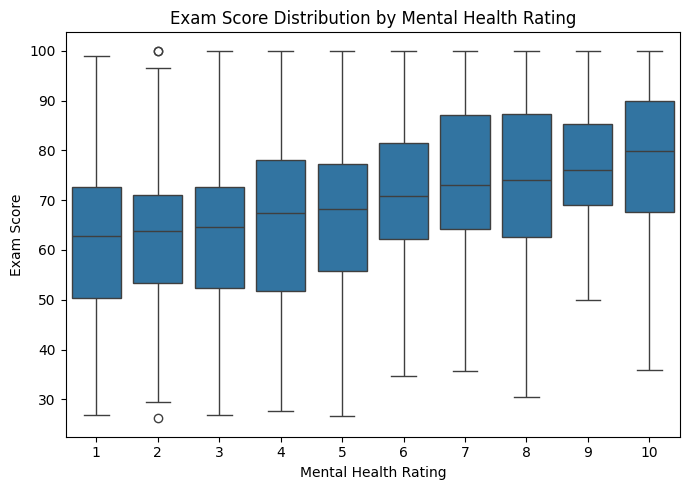

In [40]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Exam Score Distribution by Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

The boxplot illustrates how exam scores vary across different mental health ratings. We observe that students reporting better mental health tend to have higher median exam scores, though some variability exists.

### 4.3 Screen Time 

Combining social media and Netflix hours into a total screen time variable reveals a slight negative correlation with exam performance. Higher screen time is associated with marginally lower exam scores.

In [36]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
corr = df[['total_screen_time', 'exam_score']].corr().iloc[0,1]
print(f"Correlation between total screen time and exam score: {corr:.2f}")

Correlation between total screen time and exam score: -0.24


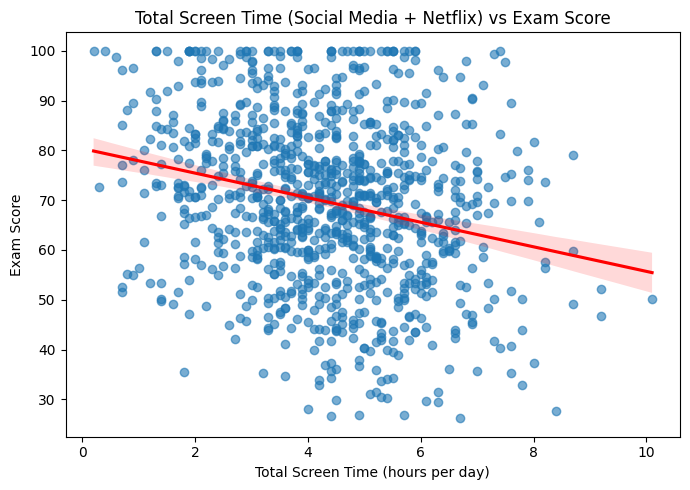

In [39]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='total_screen_time', y='exam_score', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Total Screen Time (Social Media + Netflix) vs Exam Score')
plt.xlabel('Total Screen Time (hours per day)')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

To better understand the impact of screen time, we combined social media and Netflix hours into a total screen time variable. This combined measure shows a slightly stronger negative correlation with exam scores (r = -0.24) compared to looking at social media or Netflix hours separately (r ≈ -0.17 each). This suggests that overall screen exposure may have a more consistent negative association with academic performance.

The scatterplot with regression line suggests a mild negative association between total daily screen time and exam scores, indicating that increased screen use might slightly detract from academic performance.

#### Summary

Study time strongly benefits academic performance, while better mental health supports higher and more consistent exam results. Excessive screen time shows a mild negative association with exam scores but is less influential.

---

## 5. Combined Effects on Academic Performance

I will consider how different factors might have a combined effect on the general results.


### 5.1 Screen Time & Study Time 

In [23]:
# Low study group
df['low_study'] = df['study_hours_per_day'] < 1.5

# High screen time group
df['high_screen'] = df['total_screen_time'] > 4

# Part time employment
df['has_job'] = df['part_time_job'] == True

##### Study time vs Screen time

In [24]:
# Low study vs High Screen time
df.groupby(['low_study', 'high_screen'])['exam_score'].mean()

low_study  high_screen
False      False          75.835661
           True           69.024085
True       False          48.282857
           True           38.058140
Name: exam_score, dtype: float64

There is a clear drop in exam scores when screen time goes up, even for those studying more. 
This could imply that what you do in your spare time has an effect on focus and quality of study (wellbeing).

### 5.2 Adding Mental Health into the Mix

In [25]:
# Let us explore study time and screen time further by adding the wellbeing factor which we measure by mental health rating
df['low_mental_health'] = df['mental_health_rating'] <= 3
summary = df.groupby(['low_study', 'high_screen', 'low_mental_health'])['exam_score'].mean().reset_index()
summary

,low_study,high_screen,low_mental_health,exam_score
0,False,False,False,78.341304
1,False,False,True,70.303200
2,False,True,False,72.027596
3,False,True,True,61.839216
4,True,False,False,50.388462
5,True,False,True,42.200000
6,True,True,False,39.860000
7,True,True,True,33.900000


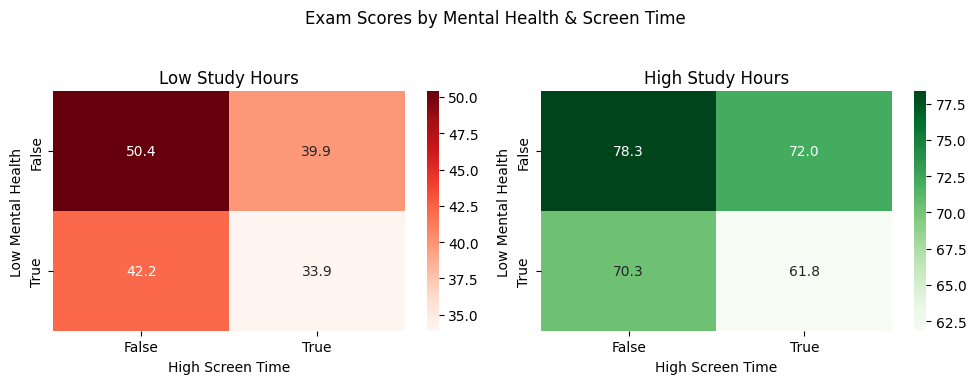

In [26]:
# Pivot table with mental health on rows, screen time on columns, separated by study group
pivot_low_study = summary[summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')
pivot_high_study = summary[~summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(pivot_low_study, annot=True, fmt=".1f", cmap='Reds', ax=axes[0])
axes[0].set_title('Low Study Hours')
axes[0].set_ylabel('Low Mental Health')
axes[0].set_xlabel('High Screen Time')

sns.heatmap(pivot_high_study, annot=True, fmt=".1f", cmap='Greens', ax=axes[1])
axes[1].set_title('High Study Hours')
axes[1].set_ylabel('Low Mental Health')
axes[1].set_xlabel('High Screen Time')

plt.suptitle('Exam Scores by Mental Health & Screen Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Conclusions
- Study Hours Are Most Important\
Students who study more score significantly higher, regardless of screen time or mental health.

- High Screen Time Is Linked to Lower Scores\
Especially among low-study students, more screen time is associated with a noticeable drop in performance.

- Poor Mental Health Lowers Performance\
Students with low mental health perform worse, especially when paired with high screen time and low study time.

- The Combination Matters Most\
The lowest scores come from students with low study time, high screen use, and poor mental health. The highest scores come from the opposite group.


----

## 6. Lifestyle Factors and Mental Health 

##### Does liefestyle affect wellbeing?

We will now explore which lifestyle factors might be associated with better or worse mental health.

### 6.1 Mental Health vs Sleep and Exercise

In [27]:
# Binary split based on thresholds (adjust if needed)
df['low_sleep'] = df['sleep_hours'] < 5
df['low_exercise'] = df['exercise_frequency'] < 2

# Also keep the mental health low/high split
df['low_mental_health'] = df['mental_health_rating'] <= 4

In [28]:
df.groupby('low_sleep')['mental_health_rating'].mean()

low_sleep
False    5.453318
True     5.366972
Name: mental_health_rating, dtype: float64

In [29]:
df.groupby('low_exercise')['mental_health_rating'].mean()

low_exercise
False    5.477465
True     5.361111
Name: mental_health_rating, dtype: float64

In [30]:
summary = df.groupby(
    ['low_sleep', 'low_exercise']
).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size')
).reset_index()
print(summary)

   low_sleep  low_exercise  proportion_low_mental_health  count
0      False         False                      0.394035    637
1      False          True                      0.432540    252
2       True         False                      0.452055     73
3       True          True                      0.444444     36


In [31]:
summary = df.groupby(
    ['low_sleep', 'low_exercise']
).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size'),
    mean_exam_result=('exam_score', 'mean')
).reset_index()
summary

,low_sleep,low_exercise,proportion_low_mental_health,count,mean_exam_result
0,False,False,0.394035,637,71.604239
1,False,True,0.432540,252,66.913492
2,True,False,0.452055,73,66.082192
3,True,True,0.444444,36,62.830556


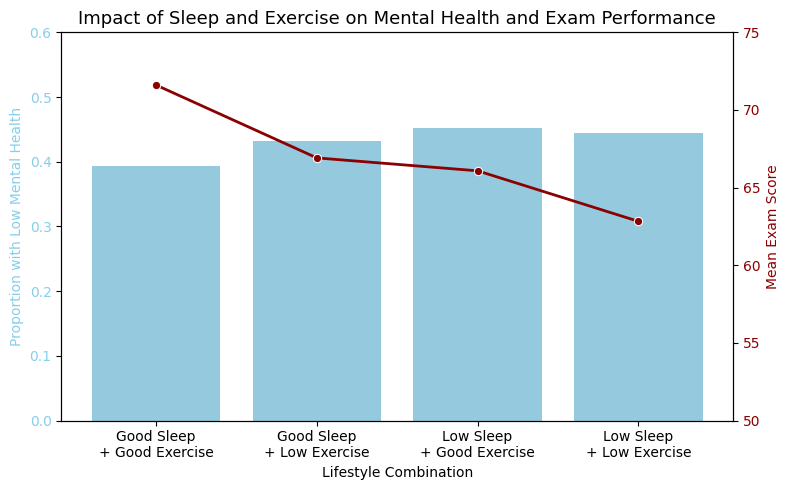

In [32]:
conditions = [
    (summary['low_sleep']) & (summary['low_exercise']),
    (summary['low_sleep']) & (~summary['low_exercise']),
    (~summary['low_sleep']) & (summary['low_exercise']),
    (~summary['low_sleep']) & (~summary['low_exercise']),
]
choices = [
    'Low Sleep\n+ Low Exercise',
    'Low Sleep\n+ Good Exercise',
    'Good Sleep\n+ Low Exercise',
    'Good Sleep\n+ Good Exercise'
]
summary['group'] = np.select(conditions, choices, default='Other')

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

sns.barplot(x='group', y='proportion_low_mental_health', data=summary,
            color='skyblue', ax=ax1)
ax1.set_ylabel('Proportion with Low Mental Health', color='skyblue')
ax1.set_ylim(0, 0.6)
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
sns.lineplot(x='group', y='mean_exam_result', data=summary,
             color='darkred', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Mean Exam Score', color='darkred')
ax2.set_ylim(50, 75)
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.set_xlabel('Lifestyle Combination')
plt.title('Impact of Sleep and Exercise on Mental Health and Exam Performance', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Conclusions

Mental health declines when sleep or exercise is low.

Exam performance mirrors this trend — lowest when both are low.

---

Students who sleep enough and exercise regularly have:

- Lowest proportion of low mental health (39%)

- Highest exam score (71.6)

Those who lack both have:

- Worse mental health (44%)

- Lowest exam score (62.8)


Sleep seems slightly more impactful than exercise
When only sleep is missing (but exercise is good), mental health worsens more (45%) than when only exercise is missing (43%).

This group also performs slightly worse on exams (66.1 vs 66.9).


------

## Conclusions